# charts

A Jupyter notebook on producing certain types of visualization.

## Contents

- 2D function-to-color

(61, 61)


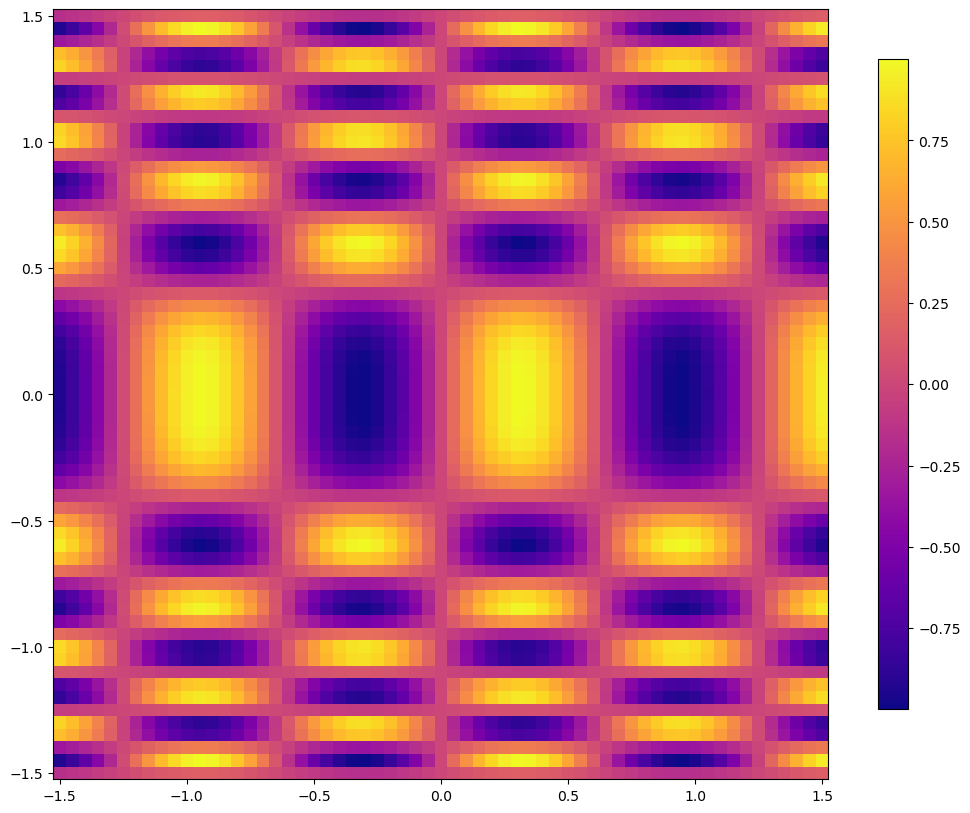

In [3]:
# This framework builds a colorized image of a function defined over a 2D range.
#   It could be applied to complex-valued functions, for example for Julia sets. 
#   It features some numpy automatic range management using the np.vectorize() function.

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, sin, cos

def z(x, y):
    '''This function calculates a scalar value from a complex number (x, y)'''
    lambda_x, lambda_y = x, y                 # don't use lambda; but it is important for the Mandelbrot set
    return sin(x*5)*cos((3*y)**2)

# np.vectorize() operates on the z() function above running it for a range of x- and y-values.
# It does the for-loops implicitly; so the result z2() will expect range controls.
z2 = np.vectorize(z)

# Step size on the complex plane
epsilon = .05

# np.arange() produces 1D arrays x and y: -1.5, -1.45 etcetera
x = np.arange(-1.5, 1.5 + epsilon, epsilon)
y = np.arange(-1.5, 1.5 + epsilon, epsilon)

# np.meshgrid(x, y) expands x and y to produce every coordinate pair. The meshgrid can be passed
#   to z2() defined above.
X, Y = np.meshgrid(x, y)

# Use z2() to calculate a 2D numpy array ('ndarray': n-dimensional array) as the basis of our figure.
Z = z2(X, Y)
print(Z.shape)

# The figure as a blank canvas
fig, ax = plt.subplots(figsize=(10,10))

# See the matplotlib colortable list
my_cmap = 'plasma'

# axis.pcolormesh() draws the image; note the non-linear y-behavior. 
#   x is x coordinates, y is y; Z is the function value at (x, y), cmap is a color map
# Colors are assigned automatically from the distribution of function values; easy.
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)

# cax defines where the colorbar should be drawn using plot coordinates (not the x, y coordinates)
cax = fig.add_axes([.95, 0.18, .03, .65])
fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()